In [16]:
import pyoti.sparse as oti
import numpy        as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman",
    "font.size": 12,
    "font.sans-serif": ["Helvetica"]
})

np.set_printoptions(linewidth=100)

In [2]:
def func(x,alg = np):
    return x*alg.cos(x)+alg.sin(x)
def dfunc(x,alg = np):
    return -x*alg.sin(x)+2*alg.cos(x)

In [3]:
hs = -np.arange(0,31)
perts = 10.0**hs
perts

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08, 1.e-09, 1.e-10,
       1.e-11, 1.e-12, 1.e-13, 1.e-14, 1.e-15, 1.e-16, 1.e-17, 1.e-18, 1.e-19, 1.e-20, 1.e-21,
       1.e-22, 1.e-23, 1.e-24, 1.e-25, 1.e-26, 1.e-27, 1.e-28, 1.e-29, 1.e-30])

In [4]:
xr = 3

# Direct differentiation
df_analit = dfunc(np.ones(perts.size)*xr)

# Using OTIs (duals)
df_oti = func(xr + oti.array(perts)*oti.e(1),alg=oti)/oti.array(perts)
df_oti = df_oti.get_deriv(1).reshape(-1)
err_oti  = abs((df_oti-df_analit)/df_analit)

# Usign Complex
df_ctse = func(xr+perts*1j).imag/perts
err_ctse  = abs((df_ctse-df_analit)/df_analit)

# Forward differences
df_fd = (func(xr+perts)-func(xr))/perts
err_fd  = abs((df_fd-df_analit)/df_analit)

# Central differences
df_cd = (func(xr+perts)-func(xr-perts))/(2*perts)
err_cd  = abs((df_cd-df_analit)/df_analit)



In [5]:
err_fd

array([7.74264830e-01, 5.59789792e-02, 5.32842678e-03, 5.30110818e-04, 5.29837246e-05,
       5.29808640e-06, 5.29644720e-07, 5.21741484e-08, 1.15226291e-08, 2.54332974e-08,
       1.50367036e-06, 9.58310761e-06, 2.12152452e-04, 2.18998277e-03, 1.62879805e-02,
       7.61018359e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

<IPython.core.display.Javascript object>


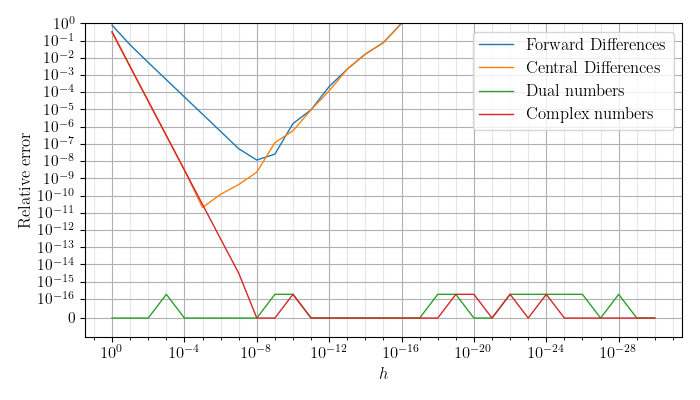

[]

In [25]:
plt.figure(figsize=(7,4))


plt.loglog(perts,err_fd,lw=1.0,label='Forward Differences')
plt.loglog(perts,err_cd,lw=1.0,label='Central Differences')

plt.loglog(perts,err_oti,lw=1.0,label='Dual numbers')
plt.loglog(perts,err_ctse,lw=1.0,label='Complex numbers')


plt.grid(True)
ax = plt.gca()

ax.invert_xaxis()
ax.set_yscale('symlog', linthresh=1e-16)
plt.axis([None,None,-1e-16,1])
plt.legend()
plt.yticks(fontsize=11 )
plt.ylabel('Relative error')
plt.xlabel('$h$')





plt.tight_layout()

plt.grid(which='minor', color=(0.9,0.9,0.9))

# ax.yaxis.set_major_locator(ticker.LogLocator(base=10,numticks=8))
# ax.yaxis.set_minor_locator(ticker.LogLocator(base=10,numticks=16))
# ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.xaxis.set_minor_locator(ticker.LogLocator(base=10,numticks=60))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())

plt.savefig('png/diff_examples.png',dpi=150)
plt.savefig('pdf/diff_examples.pdf',dpi=150)

plt.plot()

In [31]:
df_ctse

array([-3.18861182, -2.41065587, -2.40341807, -2.40334575, -2.40334502, -2.40334502, -2.40334502,
       -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502,
       -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502,
       -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502, -2.40334502,
       -2.40334502, -2.40334502, -2.40334502])

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -4.4408921e-16,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  4.4408921e-16,
       -4.4408921e-16,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  4.4408921e-16,  4.4408921e-16,
        0.0000000e+00,  0.0000000e+00, -4.4408921e-16, -4.4408921e-16, -4.4408921e-16,
        4.4408921e-16,  4.4408921e-16,  0.0000000e+00,  4.4408921e-16,  0.0000000e+00,
        0.0000000e+00])